<a href="https://colab.research.google.com/github/graci-py/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Imagem Tasmânia" width="500%" src="https://brasil123.com.br/wp-content/uploads/2021/09/destinations-copenhagen-banner-mobile-1024x553-1.jpg">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Copenhagen*

**Copenhagen**  é eleita a cidade mais segura do mundo em 2021, Em parte, o atual cenário vivido pode ajudar a explicar o levantamento feito pelo Índice de Cidades Seguras (SCI), realizado pela Economist Intelligence Unit. Este apanhado listou os 60 destinos internacionais mais seguros de todo o mundo. 

Esta lista considera fatores como a segurança em saúde, infraestrutura, digital, pessoal e ambiental, a mais nova a fazer parte deste estudo. Por anos, famosas cidades asiáticas como Tóquio, Cingapura e Osaka ganharam disparadamente nos primeiros lugares. No entanto, em 2021 o posto foi tomado por uma cidade europeia, Copenhagen.

A capital dinamarquesa ganhou a disputa facilmente após atingir a marca de 82,4 pontos em 100  no relatório anual. Em 2019 Copenhagen ocupava o oitavo lugar do ranking, e em questão de dois anos saltou para o topo da lista. Acredita-se que um fator primordial que tenha contribuído nesta conquista se refere à introdução de uma seção de segurança ambiental, a qual recebeu uma avaliação positiva junto à segurança pessoal. 

Já [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Copenhagen, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/denmark/hovedstaden/copenhagen/2021-09-30/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id`:número de id gerado para identificar o imóvel
* `name`: nome da propriedade anunciada
* `host_id`: número de id do proprietário (anfitrião)
* `host_name`: nome do proprietário
* `neighbourhood_group`: esta coluna não contém nenhum valor válido
* `neighbourhood`: nome do bairro
* `latitude`: coordenada da latitude da propriedade
* `longitude`: coordenada da longitude da propriedade
* `room_type`: informa o tipo de quarto ofertado
* `price`: preço para alugar o imóvel
* `minimum_nights`: quantidade mínima de noites para reserva
* `number_of_reviews`: número de reviews que a propriedade possui
* `last_review`: data do último review
* `reviews_per_month`: quantidade de reviews por mês
* `calculated_host_listings_count`: quantidade de imóveis do mesmo proprietário
* `availability_365`:  número de dias de disponibilidade dentro de 365 dias
*  `number_of_reviews_ltm`:O número de avaliações (nos últimos 12 meses)
* `license`: A licença / número de registro


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.68641,12.54741,Private room,370,2,168,2018-11-23,1.58,1,0,0,NaN
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.69196,12.57637,Entire home/apt,2400,4,51,2019-12-14,0.74,1,340,1,NaN
2,29118,Best Location in Cool Istedgade,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.67023,12.55504,Entire home/apt,725,7,22,2019-07-22,0.35,1,101,0,NaN
3,31094,"Very central and cozy, new kitchen",129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.66539,12.55639,Entire home/apt,750,2,17,2012-06-10,0.26,1,0,0,NaN
4,32379,120 m2 artist flat on Vesterbro,140105,Lise,NaN,Vesterbro-Kongens Enghave,55.67297,12.55327,Entire home/apt,1153,3,75,2019-08-17,0.66,1,12,2,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`, existe uma versão mais completa.

In [4]:
# identificar o volume de dados do DataFrame
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 9625
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que as colunas `license` e `neighbourhood_group` possuem 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem aproximadamente 14% de valores nulos.
* As variáveis `host name` e `name` têm menos de 1% dos valores nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() /df.shape[0]).sort_values(ascending = False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.143584
last_review                       0.143584
host_name                         0.000312
name                              0.000104
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

Como as colunas `license` e `neighbourhood_group` têm todos os seus valores nulos, vamos exclui-lás

In [6]:
#excluir as colunas "license" e "neighbourhood_group", pois estão com todos os seu valores ausentes
df = df.drop(columns=['license','neighbourhood_group' ])

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

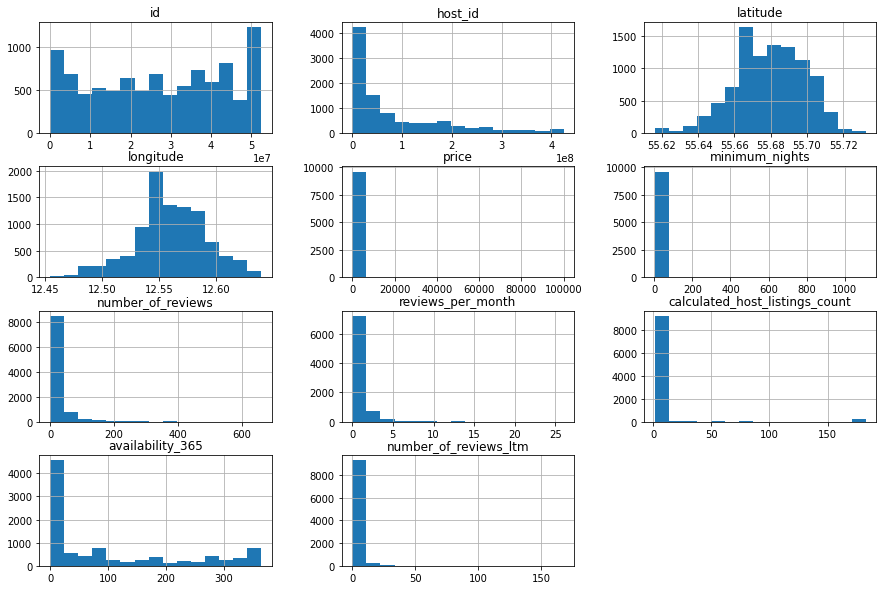

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *Outliers* presente?**


Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

#### Resumo estatístico

In [18]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9625.000000,9625.000000,9625.000000,8243.000000,9625.000000,9625.000000
mean,1085.198961,4.594182,19.841247,0.846938,6.026078,100.715636
std,2133.844053,20.835641,35.875566,1.260431,26.193626,125.832225
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,609.000000,2.000000,2.000000,0.210000,1.000000,0.000000
50%,850.000000,3.000000,8.000000,0.460000,1.000000,31.000000
75%,1200.000000,4.000000,23.000000,0.970000,1.000000,179.000000
max,100000.000000,1111.000000,660.000000,26.000000,183.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 1200, porém seu valor máximo é 100000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.


#### Boxplot para price



In [21]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)


IQR da variável price:  591.0
Limite superior de price:  2086.5
Limite inferior de price:  -277.5


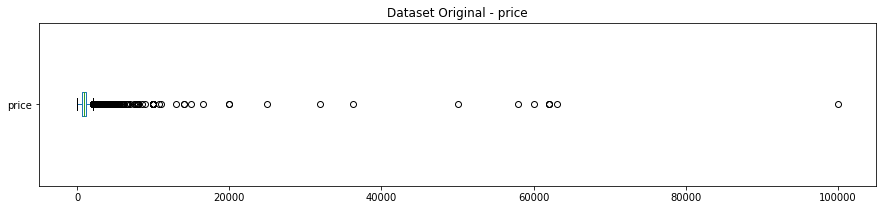

O dataset possui 9625 colunas
475 Entradas acima de 2086.5
Representam 4.94% do dataset


In [25]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 2086.5".format(len(df[df.price > 2086.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 2086.5]) / df.shape[0])*100))

#### Boxplot para minimum_nights

In [26]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  2.0
Limite superior de minimum_nights:  7.0
Limite inferior de minimum_nights:  -1.0


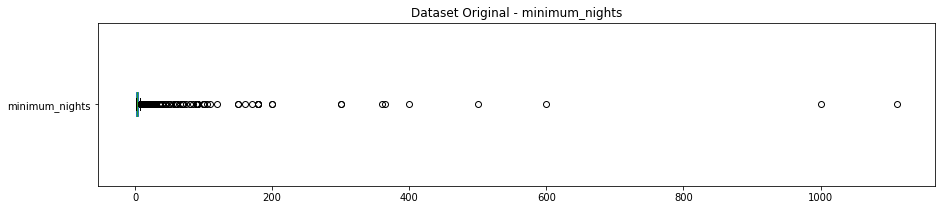

O dataset possui 9625 colunas
442 Entradas acima de 7.0
Representam 4.59% do dataset


In [32]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 7.0".format(len(df[df.minimum_nights > 7.0])))
print("Representam {:.2f}% do dataset".format((len(df[df.minimum_nights > 7.0]) / df.shape[0])*100))

#### Limpando o dataset


In [34]:
# limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 2086.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 7].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)

Shape antes da limpeza:  (9625, 16)
Shape após a limpeza:  (8723, 16)


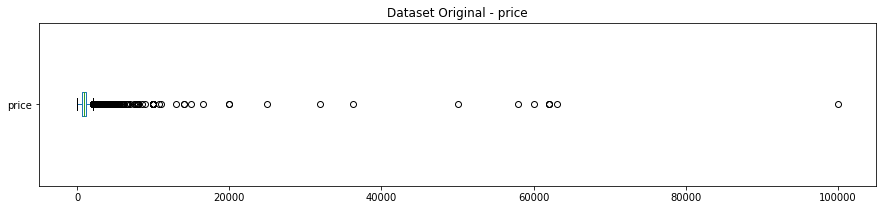

O dataset possui 9625 colunas
475 Entradas acima de  2086.5
Representam 4.94% do dataset


In [38]:
# plotando novamente o boxplot original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de  2086.5".format(len(df[df.price >  2086.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.price >  2086.5]) / df.shape[0])*100))

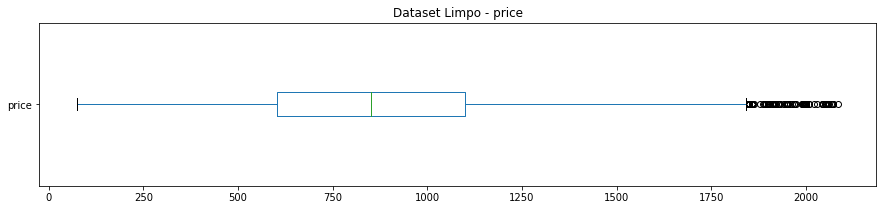

Tamanho original: 9625 colunas
Tamanho atual: 8723 colunas


In [36]:
# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} colunas".format(df.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0]))

Aqui podemos ver o resultado da limpeza.

O boxplot mostra alguns dados como outliers, entretanto, esses estão sendo calculados em relação ao novo dataset, e nossa limpeza levou em consideração os quartis do dado original.

Para garantirmos que não estamos lidando com outliers que vão prejudicar nossa análise, vamos checar os histogramas novamente.

#### Histogramas sem *outliers*


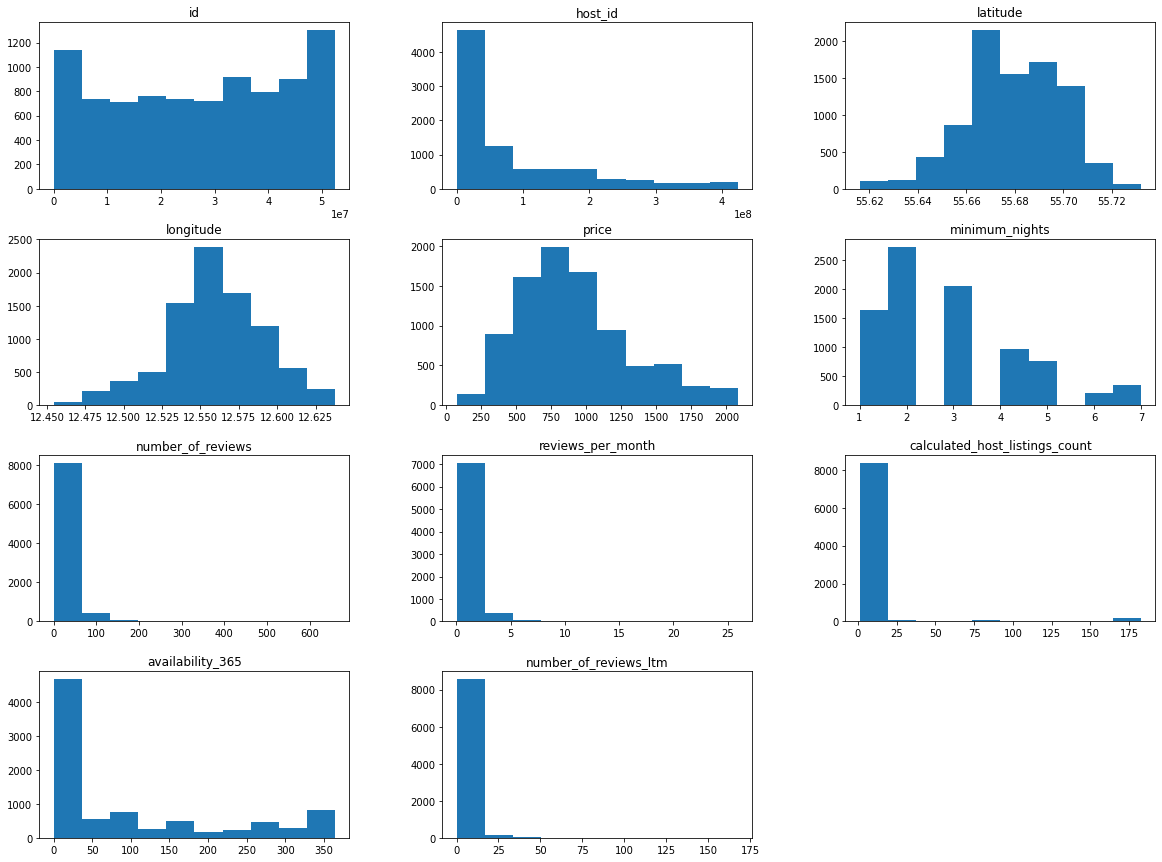

In [39]:
# verificando as distribuições
df_clean.hist(figsize=(20,15), grid=False);

In [40]:
# verificando a distribuição estatística dos dados limpos
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8723.0,8723.0,8723.0,8723.0,8723.0,8723.0,8723.0,7548.0,8723.0,8723.0,8723.0
mean,27352561.7,84363565.9,55.7,12.6,902.8,2.8,20.2,0.9,6.3,94.8,2.3
std,16408477.0,102068220.0,0.0,0.0,392.4,1.5,36.7,1.3,27.3,123.1,5.2
min,6983.0,16774.0,55.6,12.5,75.0,1.0,0.0,0.0,1.0,0.0,0.0
25%,13229310.0,11009212.0,55.7,12.5,604.0,2.0,2.0,0.2,1.0,0.0,0.0
50%,27520725.0,37173006.0,55.7,12.6,850.0,2.0,8.0,0.5,1.0,26.0,1.0
75%,42092899.0,132458025.0,55.7,12.6,1100.0,4.0,23.0,1.0,1.0,173.0,3.0
max,52512356.0,424821378.0,55.7,12.6,2085.0,7.0,660.0,26.0,183.0,365.0,168.0


Agora conseguimos ter uma ideia bem melhor da distribuição dos nossos dados.

Alguns destaques:

* A mediana da variável `price` foi pouquíssimo afetada pela limpeza dos outliers, mostrando mais uma vez a robustez desse atributo como solução para dados ausentes.
* Agora, temos dados que respeitam as regras definidas no início do notebook, onde vimos o que são bons dados.
* A média da variável `price` foi reduzida drásticamente, enfatizando a sensibilidade desse atributo em relação aos outliers.


### **Q5. Qual a média dos preços de aluguel?**


Em uma análise onde temos o valor do aluguel, se torna interessante saber a média desse valor. De modo a tirar insights que auxiliam no cálculo do gasto com a acomodação, em uma possível viagem.

Foi possível verificar que o valor médio do aluguel das acomodações é **902,76**.


In [42]:
# ver a média da coluna `price``
df_clean.price.mean()

902.7648744697925

### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [50]:
# criar uma matriz de correlação
corr = df_clean.corr()
display(corr)
# mostrar a matriz de correlação


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.463835,-0.027662,0.005564,-0.071078,-0.131055,-0.401340,0.212096,0.052798,-0.067086,0.095060
host_id,0.463835,1.000000,-0.027835,0.015076,0.001371,-0.152944,-0.166976,0.143083,0.177026,0.045167,0.112590
latitude,-0.027662,-0.027835,1.000000,-0.235946,-0.064572,0.041604,-0.014123,-0.025219,-0.040901,-0.015510,-0.010451
longitude,0.005564,0.015076,-0.235946,1.000000,0.168110,-0.031795,0.047308,0.053353,0.062556,0.042519,0.047494
price,-0.071078,0.001371,-0.064572,0.168110,1.000000,0.043000,-0.095741,-0.085894,0.158362,0.181941,-0.078558
minimum_nights,-0.131055,-0.152944,0.041604,-0.031795,0.043000,1.000000,-0.088724,-0.182986,-0.210277,-0.059443,-0.136412
number_of_reviews,-0.401340,-0.166976,-0.014123,0.047308,-0.095741,-0.088724,1.000000,0.355634,-0.085113,0.106441,0.373571
reviews_per_month,0.212096,0.143083,-0.025219,0.053353,-0.085894,-0.182986,0.355634,1.000000,-0.030399,0.097586,0.535617
calculated_host_listings_count,0.052798,0.177026,-0.040901,0.062556,0.158362,-0.210277,-0.085113,-0.030399,1.000000,-0.050063,-0.047771
availability_365,-0.067086,0.045167,-0.015510,0.042519,0.181941,-0.059443,0.106441,0.097586,-0.050063,1.000000,0.079416


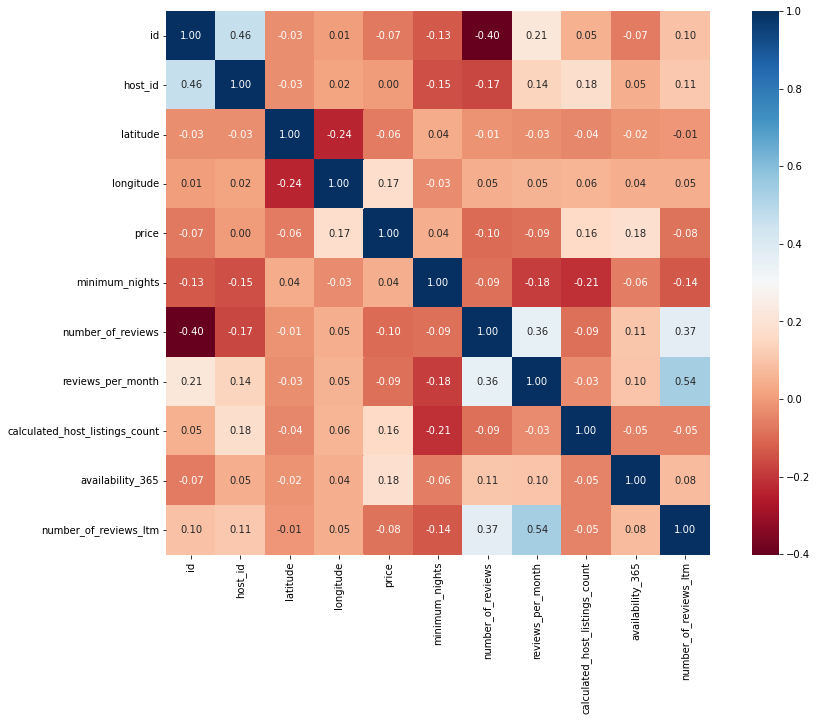

In [51]:
# plotar um heatmap a partir das correlações
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [44]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    7423
Private room       1259
Hotel room           23
Shared room          18
Name: room_type, dtype: int64

Os tipos de Imóveis que mais aparece são, em ordem:
* Casa/Apt inteiros
* Quartos privados
* Quartos de Hotel
* Quartos compartilhados


In [46]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.771221
Private room       0.130805
Hotel room         0.002390
Shared room        0.001870
Name: room_type, dtype: float64

Os imóveis tem uma distribuição bem curioso, veja:
* `Quartos privados` e `Casas/apts inteiros` ocupam cerca de 90% dos imóveis anunciados
* E menos de 1% são `Quartos de Hotel` e `Quarto Compartilhado`


### **Q8. Qual a localidade mais cara de Copenhagen?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [47]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Indre By                     1136.339273
Amager Vest                   942.760694
Frederiksberg                 908.037989
sterbro                       907.028509
Vesterbro-Kongens Enghave     898.487609
Amager st                     834.633694
Nrrebro                       812.149086
Brnshj-Husum                  785.697143
Valby                         771.513369
Vanlse                        733.750000
Name: price, dtype: float64

Acima, vemos que o bairro `Indre By` apresenta o maior valor, já os demais bairos apresenta uma média de preço bem próxima.
<br>
<br>
Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

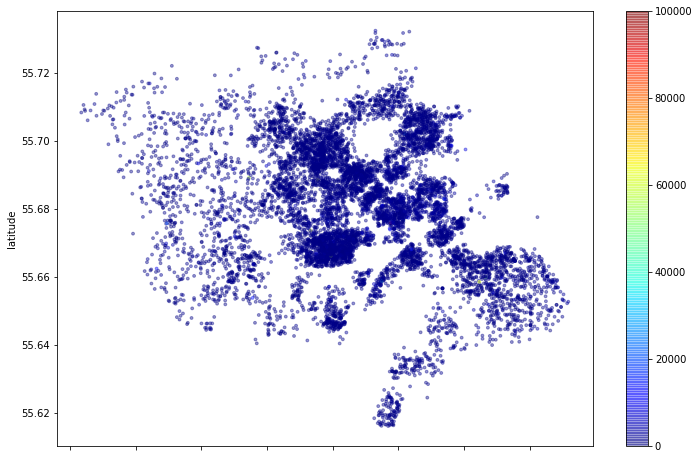

In [16]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Podemos ver que a média do mínimo de noites é 3 noites, isso nos mostra que os proprietários tendem a disponibilizar os imóveis por no mínimo 3 noites (sexta, sábado e domingo) 

In [48]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.8258626619282357

## Conclusões


Conclusões
Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

As áreas mais cara para se alugar um quarto são: Indre By, Frederiksberg, Amager Vest.

O tipo de quarto mais alugado é o Entire home/apt.

E as pessoas em média alugam os quartos por 3 noites.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial.